In [2]:
import tensorflow as tf 
import tensorflow.keras as keras 

import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
((train_data, train_labels), (eval_data, eval_labels)) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
train_data = train_data / np.float32(255.0)
train_labels = train_labels.astype(np.int32)

eval_data = eval_data / np.float32(255.0)
eval_labels = eval_labels.astype(np.int32)

Text(0.5, 1.0, '4')

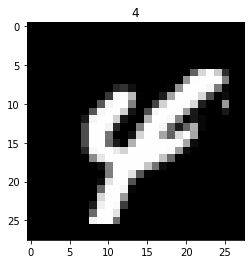

In [5]:
idx = np.random.randint(0, len(train_data))
plt.imshow(train_data[idx], cmap='gray')
plt.title(str(train_labels[idx]))

In [6]:
feature_columns = [tf.feature_column.numeric_column('x', shape=[28, 28])]

In [7]:
classifier = tf.estimator.LinearClassifier(
    feature_columns=feature_columns,
    n_classes=10,
    model_dir='mnist_model/'
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'mnist_model/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [8]:
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=100,
    num_epochs=None,
    shuffle=True)

classifier.train(input_fn=train_input_fn, steps=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into mnist_model/model.ckpt.
INFO:tensorflow:loss 

In [9]:
val_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x': eval_data},
    y=eval_labels,
    num_epochs=1,
    shuffle=False)

eval_results = classifier.evaluate(input_fn=val_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-11T11:40:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from mnist_model/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.62771s
INFO:tensorflow:Finished evaluation at 2020-05-11-11:40:41
INFO:tensorflow:Saving dict for global step 10: accuracy = 0.8098, average_loss = 0.712995, global_step = 10, loss = 0.7106581
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10: mnist_model/model.ckpt-10
{'accuracy': 0.8098, 'average_loss': 0.712995, 'loss': 0.7106581, 'global_step': 10}
